**Проект**: E-com

**Контекст**: 
Для определения стратегии на ближайшие пол года необходимо проанализировать ситуацию с продажами и сегментами аудитории, для планирования стимулирующих мероприятии, исследований и корректировки направления развития продукта

**Задача**: исследовать продажи, выявить сегменты аудитории

**Разделы исследования** <a id='stepend'></a>

1. [Импорт необходимых библиотек](#step1)</n>
2. [Загрузка необходимых данных](#step2)
3. [Проведение первичного анализа данных](#step3)
4. [Исследование механики заказа и оплаты](#step4)
5. [Сколько у нас пользователей, которые совершили покупку только один раз?](#step5)
6. [Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?](#step6)
7. [По каждому товару определить, в какой день недели товар чаще всего покупается.](#step7)
8. [Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? ](#step8)
9. [Когортный анализ пользователей](#step9)
10. [Выбор границы сегментов для RFM-анализа](#step10)
11. [RFM-анализ](#step11)
12. [Результаты анализа и предложения](#step12)

### `1 Импортируем необходимые библиотеки` <a id="step1"></a>



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from operator import attrgetter 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

###  `2 Загрузим необходимые данные`<a id="step2"></a> 

#### 2.1  Загрузим таблицу с уникальными идентификаторами пользователей -  olist_customers_datase.csv 


In [9]:
customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/промежуточный_проект/olist_customers_dataset.csv')


* customer_id — позаказный идентификатор пользователя
* customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city —  город доставки пользователя
* customer_state —  штат доставки пользователя

#### 2.2  Загрузим таблицу заказов -  olist_orders_dataset.csv


In [10]:
orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/промежуточный_проект/olist_orders_dataset.csv')


* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

Статусы заказов:
* created — создан
* approved — подтверждён
* invoiced — выставлен счёт
* processing  — в процессе сборки заказа
* shipped — отгружен со склада
* delivered — доставлен пользователю
* unavailable — недоступен
* canceled — отменён

#### 2.3  Загрузим таблицу c товарными позициями, входящими в заказ - olist_order_items_dataset.csv


In [11]:
order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/промежуточный_проект/olist_order_items_dataset.csv')


* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара

###  `3 Проведем первичный анализ данных`<a id="step3"></a> 



#### 3.1  Исследуем таблицу customers_dataset


3.1.1 Размеры customers_dataset


In [12]:
customers_dataset.shape

(99441, 5)

In [13]:
customers_dataset.customer_unique_id.count  ()        

99441

3.1.2 Проверим на дубликаты customers_dataset

In [14]:
customers_dataset.loc[customers_dataset.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


>**Комментарий**: *Дубликатов нет*


3.1.3 Типы колонок customers_dataset


In [15]:
customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

#### 3.2  Исследуем таблицу orders_dataset


3.2.1 Размеры orders_dataset


In [16]:
orders_dataset.shape

(99441, 8)

3.2.2 Проверим на дубликаты orders_dataset

In [17]:
orders_dataset.loc[orders_dataset.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


3.2.3 Типы колонок customers_dataset


In [18]:
orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

3.2.4 Переведем дату в формат даты

In [19]:
orders_dataset[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders_dataset[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime )

In [20]:
orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

#### 3.3  Исследуем таблицу order_items_dataset

3.3.1 Размеры order_items_dataset


In [21]:
order_items_dataset.shape

(112650, 7)

3.3.2 Проверим на дубликаты order_items_dataset

In [22]:
order_items_dataset.loc[order_items_dataset.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


3.3.3 Типы колонок customers_dataset


In [23]:
order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

3.3.4 Переведем дату в формат даты


In [24]:
order_items_dataset[['shipping_limit_date']] = order_items_dataset[['shipping_limit_date']].apply(pd.to_datetime )

In [25]:
order_items_dataset.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### 3.3  Проверим на наличие пустых значений

3.3.1 Таблица с уникальными идентификаторами пользователей


In [26]:
customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

3.3.2 Таблица с заказами


In [27]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

3.3.3 Таблица с товарными позициями, входящими в заказ


In [28]:
order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### `4 Исследуем механику заказа и оплаты`<a id="step4"></a> 


>**Комментарий**: *Разберемся в структуре заказа, чтобы определить понятия, которыми будем оперировать, главное - что будем считать покупкой*


4.1 Соединим две таблицы  - таблицу с заказами и таблицу с товарными позициями


In [29]:
order_and_items = order_items_dataset.merge(orders_dataset, how= 'right', on ='order_id')

# order_items_dataset - 112650
# orders_dataset - 99441

In [30]:
order_and_items.groupby('order_status').agg({'order_id':'count'})

,order_id
order_status,
approved,3
canceled,706
created,5
delivered,110197
invoiced,361
processing,357
shipped,1186
unavailable,610


4.2 Посмотрим на размерность таблицы

In [31]:
order_and_items.shape

(113425, 14)

 4.3 Посмотрим на пустые значения таблицы

In [32]:
order_and_items.isna().sum()

order_id                            0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
dtype: int64

4.4 Заполним пустые значения и посмотрим на состояние заказов, оплат и изменения в пустых значениях

In [33]:
empty_orders_and_items = order_and_items.fillna('empty')

In [34]:
empty_orders_and_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


4.5 Посмотрим как ведут себя статусы заказа, пустые значения и даты

4.5.1 Статусы заказа и их количество


In [35]:
quantity_order_approved = empty_orders_and_items.groupby('order_status') \
                                               .agg({'order_id':'count'}) \
                                               .sort_values('order_id', ascending=False) \
                                               .rename(columns={'order_id': 'quantity'}) \
                                               .reset_index()

In [36]:
quantity_order_approved

,order_status,quantity
0,delivered,110197
1,shipped,1186
2,canceled,706
3,unavailable,610
4,invoiced,361
5,processing,357
6,created,5
7,approved,3


4.5.2 Статусы заказа с пустыми значениям подтвержденной оплаты

In [37]:
quntity_empty_order_approved = empty_orders_and_items.query('order_approved_at == "empty"') \
                                                     .groupby('order_status') \
                                                     .agg({'order_id':'count'}) \
                                                     .rename(columns={'order_id': 'quantity'}) \
                                                     .reset_index()

In [38]:
quntity_empty_order_approved

,order_status,quantity
0,canceled,141
1,created,5
2,delivered,15


4.5.3 Доставлено и время подтверждения оплаты - отсутствует

In [39]:
delivered_without_approved = empty_orders_and_items.query('order_status == "delivered" and order_approved_at == "empty"')

In [40]:
delivered_without_approved

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6009,e04abd8149ef81b95221e88f6ed9ab6a,1,0e20a07ca1714df21f9b07ca3bf7c682,4e7c18b98d84e05cbae3ff0ff03846c2,2017-02-22 13:40:00,309.9,39.11,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,empty,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
18860,8a9adc69528e1001fc68dd0aaebbb54a,1,2c2b6a28924791234bd386bddb17512e,a4b6b9b992b46e9ef863637af96e04bc,2017-02-22 11:45:31,379,17.86,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,empty,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
21661,7013bcfc1c97fe719a7b5e05e61c12db,1,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,2017-02-22 12:29:47,49.99,15.53,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,empty,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
25796,5cf925b116421afa85ee25e99b4c34fb,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,empty,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
26359,12a95a3c06dbaec84bcfb0e2da5d228a,1,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,empty,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
30541,c1d4211b3dae76144deccd6c74144a88,1,5ab02ca028398131a5ae91401eb49788,80e6699fe29150b372a0c8a1ebf7dcc8,2017-01-23 12:48:08,39.99,14.52,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,empty,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
43631,d69e5d356402adc8cf17e08b5033acfb,1,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,2017-02-26 01:28:47,149.8,13.63,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,empty,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
44820,d77031d6a3c8a52f019764e68f211c69,1,02a79d79e818ad0be36cfc843a6af7ad,cb3dd9ce66268c7a3ca7241ac70ab58c,2017-02-25 10:04:19,28.99,10.96,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,empty,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
55152,7002a78c79c519ac54022d4f8a65e6e8,1,c3b271f47e73d0c9ccf1b43b7606c705,cca3071e3e9bb7d12640c9fbe2301306,2017-01-29 22:26:59,45.9,14.52,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,empty,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
70281,2eecb0d85f281280f79fa00f9cec1a95,1,4fd676d9c4723d475026e40aeae56957,5fd924b4836098a5be0ecf81ba054ce0,2017-02-21 16:21:55,135,19.23,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,empty,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


4.6 Создадим колонки с разницей в количестве дней между этапами движения заказа


In [41]:
order_and_items_time_difference = order_and_items.copy()

In [42]:
order_and_items_time_difference['создание&оплата_заказа'] = (order_and_items_time_difference['order_approved_at'] - order_and_items_time_difference['order_purchase_timestamp']).dt.days

In [43]:
order_and_items_time_difference['оплата&на_доставку'] = (order_and_items_time_difference['order_delivered_carrier_date'] - order_and_items_time_difference['order_approved_at']).dt.days

In [44]:
order_and_items_time_difference['создание&на_доставку'] = (order_and_items_time_difference['order_delivered_carrier_date'] - order_and_items_time_difference['order_purchase_timestamp']).dt.days

In [45]:
order_and_items_time_difference['создание&доставка'] = (order_and_items_time_difference['order_delivered_customer_date'] - order_and_items_time_difference['order_purchase_timestamp']).dt.days

In [46]:
order_and_items_time_difference['оплата&доставка'] = (order_and_items_time_difference['order_delivered_customer_date'] - order_and_items_time_difference['order_approved_at']).dt.days

In [47]:
empty_time_diff = order_and_items_time_difference.fillna('empty')

In [48]:
empty_time_diff

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,2,2,8,8
1,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,0,1,13,12
2,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,0,9,9
3,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45,27.2,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,3,3,13,13
4,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.9,20.1,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0,1,1,22,22
113421,83c1379a015df1e13d02aae0204711ab,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0,1,1,24,24
113422,11c177c8e97725db2631073c19f07b62,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0,3,3,17,17
113423,11c177c8e97725db2631073c19f07b62,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0,3,3,17,17


4.7 Посмотрим, то творится там, где статус доставлено, но нет подтверждения оплаты

4.7.1 Статус - Доставлено

In [49]:
empty_time_diff.query('order_status =="delivered"').query('order_approved_at !="empty"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,2,2,8,8
1,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,0,1,13,12
2,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,0,9,9
3,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45,27.2,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,3,3,13,13
4,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.9,20.1,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0,1,1,22,22
113421,83c1379a015df1e13d02aae0204711ab,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0,1,1,24,24
113422,11c177c8e97725db2631073c19f07b62,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0,3,3,17,17
113423,11c177c8e97725db2631073c19f07b62,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0,3,3,17,17


4.7.2 Статус - Cоздан

In [50]:
empty_time_diff.query('order_status == "created"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
8424,b5359909123fa03c50bdb0cfed07f098,empty,empty,empty,empty,empty,empty,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,empty,empty,empty,2018-01-11,empty,empty,empty,empty,empty
10468,dba5062fbda3af4fb6c33b1e040ca38f,empty,empty,empty,empty,empty,empty,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,empty,empty,empty,2018-03-07,empty,empty,empty,empty,empty
24403,7a4df5d8cff4090e541401a20a22bb80,empty,empty,empty,empty,empty,empty,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,empty,empty,empty,2017-12-12,empty,empty,empty,empty,empty
62774,35de4050331c6c644cddc86f4f2d0d64,empty,empty,empty,empty,empty,empty,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,empty,empty,empty,2018-01-08,empty,empty,empty,empty,empty
67145,90ab3e7d52544ec7bc3363c82689965f,empty,empty,empty,empty,empty,empty,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,empty,empty,empty,2017-12-01,empty,empty,empty,empty,empty


4.7.3 Статус - Подтверждён

In [51]:
empty_time_diff.query('order_status == "approved"')  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
51158,a2e4c44360b4a57bdff22f3a4630c173,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,empty,empty,2017-03-01,0,empty,empty,empty,empty
51159,a2e4c44360b4a57bdff22f3a4630c173,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,empty,empty,2017-03-01,0,empty,empty,empty,empty
100774,132f1e724165a07f6362532bfb97486e,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,2017-05-08 20:32:41,169.9,9.56,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,empty,empty,2017-05-22,5,empty,empty,empty,empty


4.7.4 Статус - Выставлен счёт

In [52]:
empty_time_diff.query('order_status == "invoiced"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
6,136cce7faa42fdb2cefd53fdc79a6098,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9,16.05,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,empty,empty,2017-05-09,2,empty,empty,empty,empty
118,0760a852e4e9d89eb77bf631eaaf1c84,1,1522589c64efd46731d3522568e5bc83,28405831a29823802aa22c084cfd0649,2018-08-13 06:15:14,35,15.35,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,empty,empty,2018-08-21,3,empty,empty,empty,empty
515,38b7efdf33dd5561f4f5d4f6e07b0414,1,8988d11aace15e3c9e25763c6d87dcf5,891071be6ba827b591264c90c2ae8a63,2017-08-10 18:32:30,29.99,14.1,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,empty,empty,2017-08-28,0,empty,empty,empty,empty
2083,51b0dccc8596ce37a930dff2d63a10a2,1,bace90a7338e9d31371ad47811cf4c7d,1a3df491d1c4f1589fc2b934ada68bf2,2017-05-11 22:45:12,99.9,17.78,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,empty,empty,2017-06-06,0,empty,empty,empty,empty
2407,5504eaa5a86eb25fa666cf2e6b96c701,1,4a3b0111d9c112251e4732b44d1d118b,3a734b715d333a2588a3d54a0c9b8746,2017-12-05 08:56:23,117,14.57,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,empty,empty,2017-12-20,0,empty,empty,empty,empty


4.7.5 Статус - В процессе сборки заказа

In [53]:
empty_time_diff.query('order_status == "processing"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
148,15bed8e2fec7fdbadb186b57c46c92f2,1,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.9,12.38,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,empty,empty,2017-10-03,0,empty,empty,empty,empty
369,d3c8851a6651eeff2f73b0e011ac45d0,1,ca17b18b38db6e0d2c33d362322f2a06,4be2e7f96b4fd749d52dff41f80e39dd,2016-10-21 16:24:45,267,32.84,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,empty,empty,2016-12-09,0,empty,empty,empty,empty
854,6a6c7d523fd59eb5bbefc007331af717,1,73a6530caef9511c04711d12dcef551c,4e42581f08e8cfc7c090f930bac4552a,2017-12-05 23:15:15,129,47.61,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,empty,empty,2017-12-20,0,empty,empty,empty,empty
1360,745e1d4a7f8c4b548881788d4113bb1d,1,4ddea479f39c2acfbde72ff8ddcec134,ec21206b7894c503788a684a7bc822a6,2017-11-24 02:15:40,32.9,15.1,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,empty,empty,2017-12-12,0,empty,empty,empty,empty
1731,1d52ba7197c7acebbb4f826f6585536f,1,4c35791f944cf1550e8ae288b3f9e258,79ee721b6f766066a80264402548d359,2017-03-04 17:32:55,269,17.09,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,empty,empty,2017-04-04,0,empty,empty,empty,empty


4.7.6 Статус -  Отгружен со склада


In [54]:
empty_time_diff.query('order_status == "shipped"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
46,ee64d42b8cf066f35eac1cf57de1aa85,1,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,empty,2018-06-28,0,0,0,empty,empty
185,6942b8da583c2f9957e990d028607019,1,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,empty,2018-02-07,0,0,1,empty,empty
193,36530871a5e80138db53bcfd8a104d90,1,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-17 11:45:14,36.9,26.89,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,empty,2017-06-08,1,0,2,empty,empty
268,4d630f57194f5aba1a3d12ce23e71cd9,1,62bf07cdb14270c48cf42ca0312986aa,04e38a233f726ef161074ab1c9b0399a,2017-11-23 19:50:31,199.9,40.33,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,empty,2017-12-13,0,3,4,empty,empty
340,3b4ad687e7e5190db827e1ae5a8989dd,1,6026308f343d15d492324e7e35ba5685,966cb4760537b1404caedd472cc610a5,2018-07-04 13:11:09,844,21.01,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,empty,2018-08-03,0,6,6,empty,empty


4.7.7 Статус - Доставлен пользователю


In [55]:
empty_time_diff.query('order_status == "delivered"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,2,2,8,8
1,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,0,1,13,12
2,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,0,9,9
3,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45,27.2,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,3,3,13,13
4,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,0,2,2


4.7.8 Статус - Недоступен

In [56]:
empty_time_diff.query('order_status == "unavailable"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
306,8e24261a7e58791d10cb1bf9da94df5c,empty,empty,empty,empty,empty,empty,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,empty,empty,2017-12-05,0,empty,empty,empty,empty
671,c272bcd21c287498b4883c7512019702,empty,empty,empty,empty,empty,empty,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,empty,empty,2018-02-16,0,empty,empty,empty,empty
791,37553832a3a89c9b2db59701c357ca67,empty,empty,empty,empty,empty,empty,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,empty,empty,2017-09-05,2,empty,empty,empty,empty
850,d57e15fb07fd180f06ab3926b39edcd2,empty,empty,empty,empty,empty,empty,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,empty,empty,2018-02-06,0,empty,empty,empty,empty
1326,2f634e2cebf8c0283e7ef0989f77d217,empty,empty,empty,empty,empty,empty,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,empty,empty,2017-10-27,0,empty,empty,empty,empty


4.7.9 Статус -   отменен


In [57]:
empty_time_diff.query('order_status == "canceled"').head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,создание&оплата_заказа,оплата&на_доставку,создание&на_доставку,создание&доставка,оплата&доставка
448,1b9ecfe83cdc259250e1a8aca174f0ad,1,ad673c1cd02b966e931f9db4fdc34791,9646c3513289980f17226a2fc4720dbd,2018-08-14 04:10:26,25,8.34,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,empty,empty,2018-08-14,2,empty,empty,empty,empty
705,714fb133a6730ab81fa1d3c1b2007291,1,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,2018-02-01 21:58:39,69.9,26.11,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,empty,2018-02-22,0,3,3,empty,empty
1212,3a129877493c8189c59c60eb71d97c29,1,7e857e35018e4a05b7d124d1628dc1f0,3fd1e727ba94cfe122d165e176ce7967,2018-01-31 13:50:20,35.9,15.1,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,empty,2018-02-23,0,1,1,empty,empty
1294,00b1cb0320190ca0daa2c88b35206009,empty,empty,empty,empty,empty,empty,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,empty,empty,empty,2018-09-12,empty,empty,empty,empty,empty
2040,ed3efbd3a87bea76c2812c66a0b32219,empty,empty,empty,empty,empty,empty,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,empty,empty,empty,2018-10-17,empty,empty,empty,empty,empty


### Промежуточные выводы по п.4

> **Вывод 1** - Покупкой буду считать весь заказ в статусе "Доставлено (delivered)". А не отдельные позиции в заказе. Т.е  покупкой будем считать следующую комбинацию значений product_id + order_approved_at + статус (delivered ). 

> Лучше исходить из того, что мы берем на себя всю цепочку, в том числе и логистику и концом покупки яв-ся доставка - тот самый момент, когда работа выполнена (JTBD). 

> **Вывод 2** - Также исключу из покупок заказы из п.4.5.3 - в них доставка осуществлена, но нет подтверждения оплаты - нужно разбираться

### `5 Исследуем, сколько у нас пользователей, которые совершили покупку один раз` <a id="step5"></a>

5.1 Соеденим таблицу с заказами и товарными позициями и таблицу с с уникальными идентификаторами пользователей

In [58]:
orders_dataset = orders_dataset.fillna('empty')

In [59]:
uniq_users_with_1_order = orders_dataset.query('order_status == "delivered"') \
                                        .query('order_approved_at != "empty"') \
                                        .merge(customers_dataset, on = 'customer_id') \
                                        .groupby('customer_unique_id', as_index=False).agg({'customer_id':'count'}) \
                                        .query('customer_id == 1')

In [60]:
uniq_users_with_1_order.customer_unique_id.nunique()

90545

> **Ответ** - 90545 пользователей совершили 1 покупку 

In [61]:
uniq_users_with_1_order = orders_dataset.query('order_status == "delivered"') \
                                        .query('order_approved_at != "empty"') \
                                        .merge(customers_dataset, on = 'customer_id') \
                                        .groupby('customer_unique_id', as_index=False).agg({'customer_id':'count'}) \
                                        .query('customer_id == 1')

### `6 Исследуем, сколько заказов в месяц в среднем не доставляется по разным причинам`<a id="step6"></a> 



In [62]:
tab_for_avg = order_and_items.copy()

6.1 Проверим типы данных в созданном датасете


In [63]:
tab_for_avg.dtypes

order_id                                 object
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [64]:
tab_for_avg.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


6.2 Создадим колонку с годом

In [65]:
tab_for_avg['year_approved'] = tab_for_avg.order_approved_at.dt.year

In [66]:
tab_for_avg

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_approved
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017.0
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018.0
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018.0
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017.0
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018.0
113421,83c1379a015df1e13d02aae0204711ab,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017.0
113422,11c177c8e97725db2631073c19f07b62,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018.0
113423,11c177c8e97725db2631073c19f07b62,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018.0


6.3 Создадим колонку с месяцем


In [67]:
tab_for_avg['month_approved'] = tab_for_avg.order_approved_at.dt.month_name()

6.4 Сделаем рассчет суммарного количества отмененных и неподтвержденных заказов по месяцам


In [68]:
tab_for_avg_year_month= tab_for_avg.query('order_status == "unavailable" or order_status == "canceled"') \
                  .groupby(['year_approved','month_approved', 'order_status']) \
                  .agg({'order_id':'nunique'}) \
                  .reset_index()

In [69]:
tab_for_avg_year_month

,year_approved,month_approved,order_status,order_id
0,2016.0,October,canceled,20
1,2016.0,October,unavailable,6
2,2017.0,April,canceled,13
3,2017.0,April,unavailable,9
4,2017.0,August,canceled,21
5,2017.0,August,unavailable,31
6,2017.0,December,canceled,7
7,2017.0,December,unavailable,43
8,2017.0,February,canceled,15
9,2017.0,February,unavailable,47


6.5 Рассчитаем среднее количество в месяц отмененных заказов с разбивкой по причине


In [70]:
avg_orders = tab_for_avg_year_month.groupby('order_status').order_id.mean().reset_index() 


In [71]:
avg_orders

,order_status,order_id
0,canceled,23.047619
1,unavailable,29.000000


6.6 Переименуем колонку


In [72]:
avg_orders = avg_orders.rename(columns={'order_id': 'avg'})

In [73]:
avg_orders

,order_status,avg
0,canceled,23.047619
1,unavailable,29.000000


> **Ответ** - В среднем по причине того, что заказ отменен не доставляется 24%. А по причине отсутствия товара - 29%

###  `7 Исследуем, в какой день недели каждый товар чаще всего покупается`<a id="step7"></a> 

In [74]:
tab_day_sales = order_and_items.copy()

7.1 Создадим колонку с днем продажи (то есть доставки) - день продажи = дню доставки - см. ВЫВОДЫ ПО ПУНКТУ 4 


In [75]:
tab_day_sales['day_sales'] = tab_day_sales.order_delivered_customer_date.dt.day_name()

7.2 Заполним пропуски в таблице

In [76]:
tab_day_sales = tab_day_sales.fillna('empty')

7.3 Произведем рассчет суммарных продаж с разделением на товары и дни недели


In [77]:
day_sales = tab_day_sales.query('order_approved_at  != "empty"') \
                         .query('product_id != "empty"') \
                         .query('order_status == "delivered"') \
                         .groupby(['product_id', 'day_sales']) \
                         .agg({'seller_id':'count'}) \
                         .sort_values('seller_id',ascending=False) \
                         .reset_index()

7.4 Присвоим каждой продаже ранг в зависимости от кол-ва проданных товаров в определенный день


In [78]:
day_sales["rang"] = day_sales.groupby("product_id")["seller_id"].cumcount() + 1


In [79]:
day_sales

,product_id,day_sales,seller_id,rang
0,99a4788cb24856965c36a24e339b6058,Monday,111,1
1,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,107,1
2,422879e10f46682990de24d770e7f83d,Thursday,104,1
3,422879e10f46682990de24d770e7f83d,Monday,102,2
4,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,102,2
...,...,...,...,...
57700,64976272fa76578e7bb56f6d6d942ef6,Wednesday,1,2
57701,64a15444d55d43542a7b8be3ccd08928,Monday,1,1
57702,64a23a999b90cc6722df6d12c2ee5bf9,Saturday,1,1
57703,64a420f0bb1580b084eab33a8c47fc65,Tuesday,1,1


7.5 Оставим только два первых ранга по кол-ву проданных единиц


> **Комментарий** - так я минимизирую потерю данных в случае, когда товар продавался одинаково много в несколько разных дней недели

In [80]:
day_sales = day_sales.query('rang == "2" or rang == "1"')

In [81]:
day_sales

,product_id,day_sales,seller_id,rang
0,99a4788cb24856965c36a24e339b6058,Monday,111,1
1,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,107,1
2,422879e10f46682990de24d770e7f83d,Thursday,104,1
3,422879e10f46682990de24d770e7f83d,Monday,102,2
4,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,102,2
...,...,...,...,...
57700,64976272fa76578e7bb56f6d6d942ef6,Wednesday,1,2
57701,64a15444d55d43542a7b8be3ccd08928,Monday,1,1
57702,64a23a999b90cc6722df6d12c2ee5bf9,Saturday,1,1
57703,64a420f0bb1580b084eab33a8c47fc65,Tuesday,1,1


### `8 Исследуем, среднее кол-во покупок по каждому пользователю, в разрезе год/месяц`<a id="step8"></a> 

8.1 Соединим таблицу с заказами и товарными позициями и таблицу с с уникальными идентификаторами пользователей


In [82]:
order_and_items_and_id = order_and_items.merge(customers_dataset, how= 'left', on ='customer_id')

In [83]:
tab_avg_sales_per_user = order_and_items_and_id.query('order_approved_at  != "NaN"') \
                                               .query('order_status == "delivered"') \
                                               .query('order_delivered_customer_date != "NaN"')

In [84]:
tab_avg_sales_per_user

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
113421,83c1379a015df1e13d02aae0204711ab,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
113422,11c177c8e97725db2631073c19f07b62,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
113423,11c177c8e97725db2631073c19f07b62,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


8.2 Посчитаем кол-во продаж по пользователю


In [85]:
tab_avg_sales_per_user_2 = tab_avg_sales_per_user.groupby(['order_delivered_customer_date', 'customer_unique_id']) \
                                           .agg({'product_id':'count'}) \
                                           .reset_index()

8.3 Добавим год


In [86]:
tab_avg_sales_per_user_2['year_sales'] = tab_avg_sales_per_user_2.order_delivered_customer_date.dt.year

8.4 Добавим месяц


In [87]:
tab_avg_sales_per_user_2['month_sales'] = tab_avg_sales_per_user_2.order_delivered_customer_date.dt.month_name()

8.5 Добавим кол-во дней в месяце


In [88]:
tab_avg_sales_per_user_2['day_num'] = tab_avg_sales_per_user_2.order_delivered_customer_date.dt.daysinmonth

8.6 Добавим кол-во недель в месяце


In [89]:
tab_avg_sales_per_user_2['week_quantity'] = (tab_avg_sales_per_user_2.day_num / 7).round(2)

In [90]:
tab_avg_sales_per_user_2

,order_delivered_customer_date,customer_unique_id,product_id,year_sales,month_sales,day_num,week_quantity
0,2016-10-11 13:46:32,f176923a0a4ab546c7287791ccb82193,2,2016,October,31,4.43
1,2016-10-11 14:46:49,1dc848c11c2985635c268ff3dea707eb,1,2016,October,31,4.43
2,2016-10-13 03:10:34,f99053da7416fd6d626451cd49e44e0f,1,2016,October,31,4.43
3,2016-10-13 07:45:48,acf599349b44e4e51d2beacb549313ad,1,2016,October,31,4.43
4,2016-10-13 15:44:27,664f7107c351f24b16b68919398730a0,1,2016,October,31,4.43
...,...,...,...,...,...,...,...
96447,2018-09-25 00:47:25,c9f2b70eaddf459267a9de373aaf743b,1,2018,September,30,4.29
96448,2018-09-27 02:24:33,3ae68a873484afec224de126a94c5974,1,2018,September,30,4.29
96449,2018-10-02 00:18:50,4bc530761c1b59d33d7c6cb640d3ee78,1,2018,October,31,4.43
96450,2018-10-11 16:41:14,232422c2db1f7c69daf3b0f0421ebb43,1,2018,October,31,4.43


8.7 Поменяем порядок столбцов для удобства


In [91]:
tab_avg_sales_per_user_2[['customer_unique_id', 'order_delivered_customer_date', 'product_id', 'year_sales', 'month_sales', 'day_num', 'week_quantity']]

,customer_unique_id,order_delivered_customer_date,product_id,year_sales,month_sales,day_num,week_quantity
0,f176923a0a4ab546c7287791ccb82193,2016-10-11 13:46:32,2,2016,October,31,4.43
1,1dc848c11c2985635c268ff3dea707eb,2016-10-11 14:46:49,1,2016,October,31,4.43
2,f99053da7416fd6d626451cd49e44e0f,2016-10-13 03:10:34,1,2016,October,31,4.43
3,acf599349b44e4e51d2beacb549313ad,2016-10-13 07:45:48,1,2016,October,31,4.43
4,664f7107c351f24b16b68919398730a0,2016-10-13 15:44:27,1,2016,October,31,4.43
...,...,...,...,...,...,...,...
96447,c9f2b70eaddf459267a9de373aaf743b,2018-09-25 00:47:25,1,2018,September,30,4.29
96448,3ae68a873484afec224de126a94c5974,2018-09-27 02:24:33,1,2018,September,30,4.29
96449,4bc530761c1b59d33d7c6cb640d3ee78,2018-10-02 00:18:50,1,2018,October,31,4.43
96450,232422c2db1f7c69daf3b0f0421ebb43,2018-10-11 16:41:14,1,2018,October,31,4.43


8.8 Рассчитаем, сколько товаров продается в разрезе по каждому клиенту, по году/месяцу


In [92]:
tab_avg_sales = tab_avg_sales_per_user_2.groupby(['customer_unique_id', 'year_sales', 'month_sales','day_num','week_quantity']) \
                                        .agg({'product_id':'count'}) \
                                        .sort_values('product_id',ascending=False) \
                                        .rename(columns={'product_id': 'quantity'}) \
                                        .reset_index()

In [93]:
tab_avg_sales

,customer_unique_id,year_sales,month_sales,day_num,week_quantity,quantity
0,12f5d6e1cbf93dafd9dcc19095df0b3d,2017,January,31,4.43,6
1,c8460e4251689ba205045f3ea17884a1,2018,August,31,4.43,4
2,b4e4f24de1e8725b74e4a1f4975116ed,2018,March,31,4.43,4
3,25a560b9a6006157838aab1bdbd68624,2017,April,30,4.29,4
4,83e7958a94bd7f74a9414d8782f87628,2017,January,31,4.43,4
...,...,...,...,...,...,...
95287,55acabc08dae3702cb38a0670ae32193,2018,April,30,4.29,1
95288,55ac0a37e452fb828823ab5f1d974c10,2017,June,30,4.29,1
95289,55ac08310d6f70c69f92a78367dd8ff0,2017,August,31,4.43,1
95290,55ab86d9b0939b03afebc707ed6c81a9,2018,July,31,4.43,1


8.9 Рассчитаем, среднее кол-во покупок товара


In [94]:
tab_avg_sales['avg_sales_per_week'] = (tab_avg_sales.week_quantity / tab_avg_sales.quantity).round(1)

In [95]:
tab_avg_sales

,customer_unique_id,year_sales,month_sales,day_num,week_quantity,quantity,avg_sales_per_week
0,12f5d6e1cbf93dafd9dcc19095df0b3d,2017,January,31,4.43,6,0.7
1,c8460e4251689ba205045f3ea17884a1,2018,August,31,4.43,4,1.1
2,b4e4f24de1e8725b74e4a1f4975116ed,2018,March,31,4.43,4,1.1
3,25a560b9a6006157838aab1bdbd68624,2017,April,30,4.29,4,1.1
4,83e7958a94bd7f74a9414d8782f87628,2017,January,31,4.43,4,1.1
...,...,...,...,...,...,...,...
95287,55acabc08dae3702cb38a0670ae32193,2018,April,30,4.29,1,4.3
95288,55ac0a37e452fb828823ab5f1d974c10,2017,June,30,4.29,1,4.3
95289,55ac08310d6f70c69f92a78367dd8ff0,2017,August,31,4.43,1,4.4
95290,55ab86d9b0939b03afebc707ed6c81a9,2018,July,31,4.43,1,4.4


In [96]:
tab_avg_sales = tab_avg_sales[['customer_unique_id', 'year_sales','month_sales', 'avg_sales_per_week']]


> #### **Ответ**

> Ниже дана таблица по среднем кол-во покупок по каждому пользователю, в разрезе год/месяц

In [97]:
tab_avg_sales = tab_avg_sales.sort_values('customer_unique_id', ascending=False) 

In [98]:
tab_avg_sales

,customer_unique_id,year_sales,month_sales,avg_sales_per_week
95291,ffffd2657e2aad2907e67c3e9daecbeb,2017,May,4.4
32136,ffff5962728ec6157033ef9805bacc48,2018,May,4.4
32137,ffff371b4d645b6ecea244b27531430a,2017,February,4.0
32138,fffea47cd6d3cc0a88bd621562a9d061,2018,January,4.4
32139,fffcf5a5ff07b0908bd4e2dbc735a684,2017,July,4.4
...,...,...,...,...
63729,0004aac84e0df4da2b147fca70cf8255,2017,November,4.3
63730,0000f6ccb0745a6a4b88665a16c9f078,2017,November,4.3
63731,0000f46a3911fa3c0805444483337064,2017,April,4.3
79609,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,May,4.4


### `9 Проведем когортный анализ пользователей`<a id="step9"></a> 

> **Комментарий** - Используем когортный анализ, чтобы исследовать уровень удержания, понять, сколько пользователей возвращаются к нам для совершения покупок. Это даст нам высокоуровневое понимание поведения клиентов в зависимости от времени, когда они начали использовать наш сервис

9.1 Создадим таблцу для анализа


In [99]:
orders_users = orders_dataset.merge(customers_dataset, how='left', on=['customer_id']) 

9.2 Оставим в таблице только заказы со статусом доставлено


In [100]:
orders_delivered = orders_users.query('order_status == "delivered" & order_purchase_timestamp >= "2017-01-01"')


9.3 Оставим в таблице только необходимые колонки


In [101]:
orders_delivered = orders_delivered[['customer_unique_id','order_id','order_purchase_timestamp']]


In [102]:
orders_delivered

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39
...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05
99437,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58
99438,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43
99439,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27


9.4 Создадим датаферейм с датой первой покупки для каждого пользователя

In [103]:
customer_first_date = orders_delivered.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

In [104]:
customer_first_date

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93100,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93101,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93102,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


9.5 Переименуем колонку

In [105]:
customer_first_date = customer_first_date.rename(columns={'order_purchase_timestamp': 'first_sale_date'}) 

In [106]:
customer_first_date

,customer_unique_id,first_sale_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
93100,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
93101,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
93102,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


9.6 Объединим датафреймы и вычислим разницу в месяцах между датой покупки пользователя и первой покупкой

In [107]:
tab_cohort = orders_delivered.merge(customer_first_date, how= 'left', on ='customer_unique_id')

In [108]:
tab_cohort

,customer_unique_id,order_id,order_purchase_timestamp,first_sale_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-09-04 11:26:38
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 21:18:39
...,...,...,...,...
96206,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-09 09:54:05
96207,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-06 12:58:58
96208,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08-27 14:46:43
96209,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:28:27


9.7 Переименуем колонку с датой покупки

In [109]:
tab_cohort = tab_cohort.rename(columns={'order_purchase_timestamp': 'sale_date'}) 

In [110]:
tab_cohort

,customer_unique_id,order_id,sale_date,first_sale_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-09-04 11:26:38
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 21:18:39
...,...,...,...,...
96206,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-09 09:54:05
96207,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-06 12:58:58
96208,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08-27 14:46:43
96209,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:28:27


9.8 Создадим колонки с датой покупки и датой первой покупки в формате год-месяц

In [111]:
tab_cohort['y_m_sale'] = tab_cohort['sale_date'].dt.to_period('M')

In [112]:
tab_cohort['y_m_first_sale'] = tab_cohort['first_sale_date'].dt.to_period('M')

9.9 Создадим колонку с присвоенным каждому пользователю номером когорты

In [113]:
tab_cohort['cohort'] = tab_cohort.groupby('customer_unique_id')['sale_date'].transform('min').dt.to_period('M')

In [114]:
tab_cohort

,customer_unique_id,order_id,sale_date,first_sale_date,y_m_sale,y_m_first_sale,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10,2017-09,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 21:18:39,2018-02,2018-02,2018-02
...,...,...,...,...,...,...,...
96206,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03,2017-03,2017-03
96207,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-06 12:58:58,2018-02,2018-02,2018-02
96208,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08-27 14:46:43,2017-08,2017-08,2017-08
96209,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:28:27,2018-01,2018-01,2018-01


9.10 Создадим таблицу, в которой посчитаем кол-во пользователей в каждой когорте

In [115]:
cohort = tab_cohort.groupby(['cohort', 'y_m_sale']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index(drop=False)

In [116]:
cohort['period_number'] = (cohort.y_m_sale - cohort.cohort).apply(attrgetter('n'))


In [117]:
cohort

,cohort,y_m_sale,n_customers,period_number
0,2017-01,2017-01,718,0
1,2017-01,2017-02,2,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
202,2018-06,2018-07,25,1
203,2018-06,2018-08,16,2
204,2018-07,2018-07,5949,0
205,2018-07,2018-08,31,1


9.11 Создадим сводную таблицу

In [118]:
cohort_pivot = cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')


In [119]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,12.0,4.0,7.0,10.0,8.0,11.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,21.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,18.0,9.0,9.0,10.0,11.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9.12 Создадим отдельную переменную с номером когорты и кол-вом пользователей в ней, для использования в графике

In [120]:
cohort_size = cohort_pivot.iloc[:, 0]

In [121]:
cohort_size

cohort
2017-01     718.0
2017-02    1628.0
2017-03    2503.0
2017-04    2257.0
2017-05    3451.0
2017-06    3037.0
2017-07    3753.0
2017-08    4057.0
2017-09    4005.0
2017-10    4328.0
2017-11    7061.0
2017-12    5338.0
2018-01    6843.0
2018-02    6288.0
2018-03    6775.0
2018-04    6582.0
2018-05    6508.0
2018-06    5879.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0, dtype: float64

9.13 Используем данные из предыдущего шага для деления по когортам

In [122]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [123]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.002786,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,NaN,0.004178,0.001393,0.006964,0.004178,0.001393,0.001393,0.002786,0.004178,0.001393
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199,NaN
2017-04,1.0,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,0.001772,0.002658,0.000886,0.000443,0.000443,0.000886,0.000886,0.001329,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN
2017-07,1.0,0.005329,0.003464,0.002398,0.002931,0.002132,0.003197,0.001066,0.001865,0.002665,0.002132,0.002931,0.001332,0.002398,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006902,0.003451,0.002711,0.003451,0.005176,0.002958,0.002711,0.001479,0.001479,0.002465,0.001972,0.001232,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006991,0.005493,0.002747,0.004494,0.002247,0.002247,0.002497,0.002747,0.001998,0.002497,0.000749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9.14 Округлим значения

In [124]:
retention = (retention_matrix*100).round(1)


In [125]:
retention

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.3,0.3,0.1,0.4,0.1,0.4,0.1,0.1,NaN,0.4,0.1,0.7,0.4,0.1,0.1,0.3,0.4,0.1
2017-02,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.2,0.1,0.1,0.1,0.2,NaN
2017-03,100.0,0.4,0.4,0.4,0.4,0.2,0.2,0.3,0.3,0.1,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.1,NaN
2017-04,100.0,0.6,0.2,0.2,0.3,0.3,0.4,0.3,0.3,0.2,0.3,0.1,0.0,0.0,0.1,0.1,0.1,NaN,NaN
2017-05,100.0,0.5,0.5,0.3,0.3,0.3,0.4,0.1,0.3,0.3,0.3,0.3,0.2,0.0,0.2,0.2,NaN,NaN,NaN
2017-06,100.0,0.5,0.4,0.4,0.3,0.4,0.4,0.2,0.1,0.2,0.3,0.4,0.2,0.2,0.2,NaN,NaN,NaN,NaN
2017-07,100.0,0.5,0.3,0.2,0.3,0.2,0.3,0.1,0.2,0.3,0.2,0.3,0.1,0.2,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.7,0.3,0.3,0.3,0.5,0.3,0.3,0.1,0.1,0.2,0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.7,0.5,0.3,0.4,0.2,0.2,0.2,0.3,0.2,0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


9.14 Построим тепловую карту удержания (проценты)

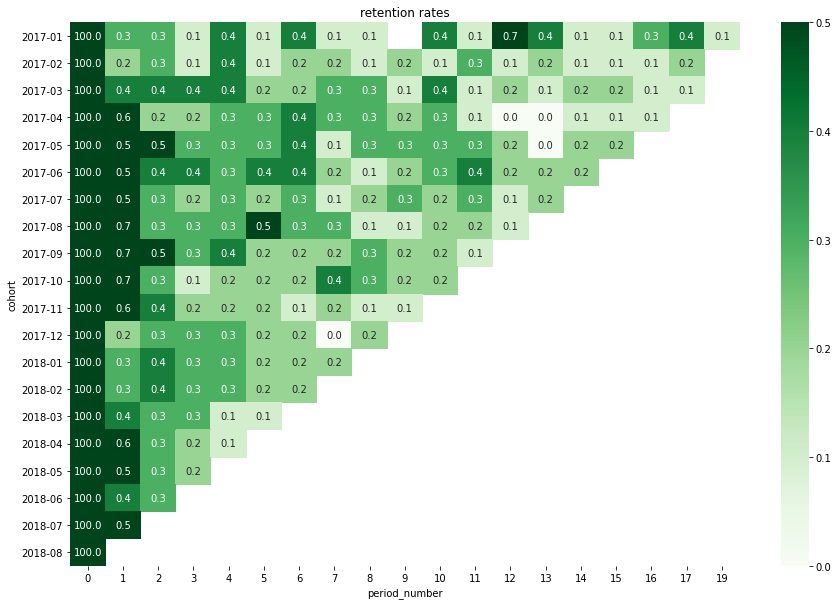

In [127]:
plt.figure(figsize=(15, 10))
plt.title('retention rates')
sns.heatmap(data=retention,annot = True,fmt = '',vmin = 0.0,vmax = 0.5,cmap="Greens")
plt.show()

> **Комментарий** - Результаты довольно интересные. В период с апреля по октябрь первый месяц когорты показывают самое лучшее удержание. А когорта от марта 2017 года показывает постоянный уровень удержания на периоде 4 месяца. Причем, тренд роста кол-ва покупателей в когорте 0 месяца растет, и при этом показатели удержания сохраняются. Похоже магазин предпринял некоторые меры для улучшения ситуации, поэтому больше покупателей вернулись сюда снова. Также стоит разобраться в месяцах, где когорты показывали нулевой уровень удержания

### `10 Выбор метрик для RFM-анализа`<a id="step10"></a> 

* Recency — давность (как давно пользователи что-то у нас покупали, сколько дней прошло с последней покупки)
* Frequency — частота (как часто они у нас покупают, кол-во покупок)
* Monetary — деньги (общая сумма покупок. выручка, без учета маржинальности для компании)

10.1 Соеденим все три таблицы, что соединить customer_unique_id с заказами, покупками, статусом и ценой

In [128]:
orders_users_items = orders_users.merge(order_items_dataset, how='left', on=['order_id']) 

10.2 Создадим таблицу в которой оставим только данные по покупкам

In [129]:
tab_for_rfm = orders_users_items.query('order_approved_at  != "NaN"') \
                                .query('order_status == "delivered"') \
                                .query('order_purchase_timestamp != "NaN"')

10.3 Убирем дубликаты на всякий случай

In [130]:
tab_for_rfm = tab_for_rfm.dropna()

10.4 Оставим только необходимую информацию

In [131]:
tab_for_rfm = tab_for_rfm[['customer_unique_id', 'order_id','order_purchase_timestamp', 'price']]


In [132]:
tab_for_rfm

,customer_unique_id,order_id,order_purchase_timestamp,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90
...,...,...,...,...
113420,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,174.90
113421,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,205.99
113422,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,179.99
113423,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,179.99


10.5 Посмотрим, за какой период у нас датасет, используем команду .describe

In [133]:
print('Покупки с {} по {}'.format(tab_for_rfm['order_purchase_timestamp'].min(), tab_for_rfm['order_purchase_timestamp'].max()))

Покупки с 2016-09-15 12:16:38 по 2018-08-29 15:00:37


10.6 Создадим переменную, от нее будет отсчитывать, сколько прошло времени с последней покупки. Назначим ее как последний день продажи

In [134]:
from datetime import timedelta

In [135]:
last_date = tab_for_rfm['order_purchase_timestamp'].max()

In [136]:
last_date = last_date + timedelta(days=1)

##### 10.7 Исследуем границы сегментов, потому что универсальных рекомендаций по этому поводу нет

10.7.1 Исследуем границы последней покупки **Recency**

In [137]:
r_research = tab_for_rfm.groupby('customer_unique_id') \
                        .agg({'order_purchase_timestamp' : lambda x : (last_date - x.max()).days}) \
                        .rename(columns={'order_purchase_timestamp': 'recency'}) \
                        .reset_index()


In [138]:
r_research

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447
93354,fffea47cd6d3cc0a88bd621562a9d061,262
93355,ffff371b4d645b6ecea244b27531430a,568
93356,ffff5962728ec6157033ef9805bacc48,119


10.7.1.2 Найдем параметры минимальное, среднее, медианное и максимальное значение дней после последней покупки

In [139]:
print('Минимальное кол-во дней с последней покупки:', r_research.recency.min())
print('Среднее кол-во дней с последней покупки:', r_research.recency.mean().round(1))
print('Медианное кол-во дней с последней покупки:', r_research.recency.median().round(1))
print('Максимальное кол-во дней с последней покупки:', r_research.recency.max())

Минимальное кол-во дней с последней покупки: 1
Среднее кол-во дней с последней покупки: 237.9
Медианное кол-во дней с последней покупки: 219.0
Максимальное кол-во дней с последней покупки: 714


10.7.1.3 Сделаем словарь с сегментами

In [140]:
r_segment = r_research['recency'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).to_dict()

10.7.1.4 Напишем функцию для присвоения перцентиля для каждой покупки в зависимости от кол-ва дней

In [141]:
def r_rang(x):
    if x <= r_segment[.1]:
        return 0.1
    elif x <= r_segment[.2]:
        return 0.2
    elif x <= r_segment[.3]:
        return 0.3
    elif x <= r_segment[.4]:
        return 0.4
    elif x <= r_segment[.5]:
        return 0.5
    elif x <= r_segment[.6]:
        return 0.6
    elif x <= r_segment[.7]:
        return 0.7
    elif x <= r_segment[.8]:
        return 0.8
    elif x <= r_segment[.9]:
        return 0.9
    else:
        return 1

10.7.1.5 Создадим колонку с указание перцентиля

In [142]:
r_research['percentile'] = r_research['recency'].apply(lambda x: r_rang(x))

In [143]:
r_research

,customer_unique_id,recency,percentile
0,0000366f3b9a7992bf8c76cfdf3221e2,112,0.3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,0.3
2,0000f46a3911fa3c0805444483337064,537,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,0.8
4,0004aac84e0df4da2b147fca70cf8255,288,0.7
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,0.9
93354,fffea47cd6d3cc0a88bd621562a9d061,262,0.6
93355,ffff371b4d645b6ecea244b27531430a,568,1.0
93356,ffff5962728ec6157033ef9805bacc48,119,0.3


10.7.1.6 Определим границы каждого перцентиля

In [144]:
r_research_border_max = r_research.groupby('percentile').max() \
                                    .rename(columns={'recency':'border_max'}) \
                                    .reset_index()

In [145]:
r_research_border_min = r_research.groupby('percentile').min() \
                                    .rename(columns={'recency':'border_min'}) \
                                    .reset_index()

In [146]:
r_research_border = r_research_border_max.merge(r_research_border_min, how= 'left', on ='percentile' )

In [147]:
r_research_border = r_research_border[['percentile', 'border_max', 'border_min']]

In [148]:
r_research_border 

,percentile,border_max,border_min
0,0.1,42,1
1,0.2,92,43
2,0.3,134,93
3,0.4,177,135
4,0.5,219,178
5,0.6,268,220
6,0.7,312,269
7,0.8,382,313
8,0.9,466,383
9,1.0,714,467


10.7.1.7 Рассчитаем кол-во в каждом перцентиле

In [149]:
r_quantity = r_research.groupby('percentile') \
                       .agg({'customer_unique_id':'count'}) \
                       .sort_values('customer_unique_id', ascending=True) \
                       .rename(columns={'customer_unique_id':'quantity'}) \
                       .reset_index()

In [150]:
r_quantity

,percentile,quantity
0,0.2,9217
1,0.7,9245
2,1.0,9257
3,0.6,9295
4,0.3,9325
5,0.8,9332
6,0.4,9380
7,0.9,9382
8,0.5,9414
9,0.1,9511


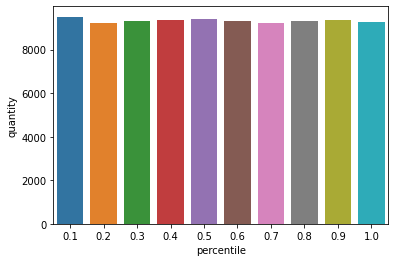

In [151]:
r_plot = sns.barplot(data=r_quantity, y='quantity', x='percentile')


> **Комментарий** - Из распределения видно, что покупки по давности распределены равномерно. Больше всего тех, кто у кого последняя покупка была 42 дня назад и меньше. Т.е это постоянные клиенты и новые. Следующие две группы имеют покупки 92 и 134 дня назад - не слишком большая разница. Т.е это постоянные клиенты и новые. Их можно выделить в отдельную категорию - 1. Перцентили 0,1 - 0,3

> Медианное значение у нас 219 дней (среднее 237) - с 0,4 по 0,7 перцентиль выделим во вторую группу.  

> Те, кто попадает в группы с 0,8 по 1 процентиль попадают в группу 3 - так как это либо редкие покупатели, либо ушедшие к конкурентам.

In [152]:
r_research_border

,percentile,border_max,border_min
0,0.1,42,1
1,0.2,92,43
2,0.3,134,93
3,0.4,177,135
4,0.5,219,178
5,0.6,268,220
6,0.7,312,269
7,0.8,382,313
8,0.9,466,383
9,1.0,714,467


10.7.2 Исследуем границы частоты покупки **Frequency**

10.7.2.1 Рассчитаем для каждого покупателя кол-во покупок

In [153]:
f_research = tab_for_rfm.groupby('customer_unique_id') \
                        .agg({'order_id' : lambda x: len(x)}) \
                        .rename(columns={'order_id': 'frequency'}) \
                        .reset_index()

In [154]:
f_research

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


10.7.2.2 Найдем параметры минимальное, среднее, медианное и максимальное значение дней после последней покупки

In [155]:
print('Минимальное кол-во дней покупок:', f_research.frequency.min())
print('Среднее кол-во покупок:', f_research.frequency.mean().round(1))
print('Медианное кол-во покупок:', f_research.frequency.median().round(1))
print('Максимальное кол-во покупок:', f_research.frequency.max())

Минимальное кол-во дней покупок: 1
Среднее кол-во покупок: 1.2
Медианное кол-во покупок: 1.0
Максимальное кол-во покупок: 24


10.7.2.3 Рассчитаем для каждого кол-ва покупок, какой их процент

In [156]:
f_num = f_research.copy()

In [157]:
f_num = f_num.groupby('frequency').agg({'customer_unique_id':'count'}) \
                                  .sort_values('customer_unique_id', ascending=False) \
                                  .rename(columns={'customer_unique_id':'quantity'}) \
                                  .reset_index()

In [158]:
f_num['per_cent'] = ((f_num.quantity / f_num.quantity.sum()) * 100).round()

In [159]:
f_num

,frequency,quantity,per_cent
0,1,81748,88.0
1,2,8797,9.0
2,3,1646,2.0
3,4,621,1.0
4,5,241,0.0
5,6,190,0.0
6,7,45,0.0
7,8,16,0.0
8,11,11,0.0
9,10,11,0.0


> **Комментарий** - Очень много разовых клиентов (88%), которые сделали 1 покупку. Присвою им группу 3 - как самые холодные. Если клиенты, но их немного, котоыре делали 2,3,4 покупки (9%, 2%, 1% соответсвенно). Такие клиенты получают категорию 2. Самое маленькое количество тех, кто сделал от 5 до 24 покупок - это самые лояльные и постоянные клиенты, - они получают категорию 1


> Т.е получается. 1 покупка - категория 3 (холодные). 1-4 покупки - категория 2 (лояльные, в зависимости от давности). 5-24 покупки - категория 1 (постоянные)

10.7.3 Исследуем границы выручки **Monetary**

10.7.3.1 Рассчитаем сумму покупок каждого покупателя

In [160]:
m_research = tab_for_rfm.groupby('customer_unique_id') \
                        .agg({'price' : lambda x: x.sum()}) \
                        .rename(columns={'price': 'monetary'}) \
                        .reset_index()

In [161]:
m_research

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89
93355,ffff371b4d645b6ecea244b27531430a,89.90
93356,ffff5962728ec6157033ef9805bacc48,115.00


10.7.3.2 Найдем параметры минимальное, среднее, медианное и максимальное значение дней после последней покупки

In [162]:
print('Минимальное кол-во выручки с клиента:', m_research.monetary.min())
print('Среднее кол-во выручки с клиента:', m_research.monetary.mean().round(1))
print('Медианное кол-во выручки с клиента:', m_research.monetary.median().round(1))
print('Максимальное кол-во выручки с клиента:', m_research.monetary.max())

Минимальное кол-во выручки с клиента: 0.85
Среднее кол-во выручки с клиента: 141.6
Медианное кол-во выручки с клиента: 89.7
Максимальное кол-во выручки с клиента: 13440.0


10.7.3.3 Рассчитаем сколько кол-во покупок одного объема


In [163]:
m_num = m_research.copy()

In [164]:
m_num = m_num.groupby('monetary').agg({'customer_unique_id':'count'}) \
                                  .sort_values('customer_unique_id', ascending=False) \
                                  .rename(columns={'customer_unique_id':'value'}) \
                                  .reset_index()

In [165]:
m_num

,monetary,value
0,59.90,1583
1,69.90,1470
2,49.90,1317
3,89.90,1134
4,99.90,1110
...,...,...
8457,228.08,1
8458,227.98,1
8459,227.97,1
8460,72.95,1


In [166]:
m_num.sort_values('monetary', ascending=False)

,monetary,value
8461,13440.00,1
5296,7388.00,1
5297,7160.00,1
5298,6735.00,1
5299,6729.00,1
...,...,...
3785,3.00,2
5313,2.99,1
5276,2.29,1
6318,2.20,1


10.7.3.3 Сделаем словарь с сегментами

In [167]:
m_segment = m_research['monetary'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).to_dict()

10.7.3.4 Напишем функцию для присвоения перцентиля для каждого "размера" покупки

In [168]:
def m_rang(x):
    if x <= m_segment[.1]:
        return 0.1
    elif x <= m_segment[.2]:
        return 0.2
    elif x <= m_segment[.3]:
        return 0.3
    elif x <= m_segment[.4]:
        return 0.4
    elif x <= m_segment[.5]:
        return 0.5
    elif x <= m_segment[.6]:
        return 0.6
    elif x <= m_segment[.7]:
        return 0.7
    elif x <= m_segment[.8]:
        return 0.8
    elif x <= m_segment[.9]:
        return 0.9
    else:
        return 1

10.7.3.5 Создадим колонку с указание перцентиля

In [169]:
m_research['percentile'] = m_research['monetary'].apply(lambda x: m_rang(x))

In [170]:
m_research

,customer_unique_id,monetary,percentile
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,0.7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,0.1
2,0000f46a3911fa3c0805444483337064,69.00,0.4
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,0.2
4,0004aac84e0df4da2b147fca70cf8255,180.00,0.9
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1.0
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89,0.4
93355,ffff371b4d645b6ecea244b27531430a,89.90,0.6
93356,ffff5962728ec6157033ef9805bacc48,115.00,0.7


10.7.3.6 Создадим таблицу с верхними границами процентилей по величине выручки

In [171]:
m_research_border_max = m_research.groupby('percentile').max() \
                                    .rename(columns={'monetary':'border_max'}) \
                                    .reset_index()

10.7.3.7 Создадим таблицу с нижними границами процентилей по величине выручки

In [172]:
m_research_border_min = m_research.groupby('percentile').min() \
                                    .rename(columns={'monetary':'border_min'}) \
                                    .reset_index()

In [173]:
m_research_border_max

,percentile,customer_unique_id,border_max
0,0.1,ffedff0547d809c90c05c2691c51f9b7,25.98
1,0.2,fff699c184bcc967d62fa2c6171765f7,39.90
2,0.3,fff96bc586f78b1f070da28c4977e810,52.99
3,0.4,ffffd2657e2aad2907e67c3e9daecbeb,69.90
4,0.5,fff3a9369e4b7102fab406a334a678c3,89.70
5,0.6,ffff371b4d645b6ecea244b27531430a,109.90
6,0.7,ffff5962728ec6157033ef9805bacc48,139.00
7,0.8,fffbf87b7a1a6fa8b03f081c5f51a201,179.90
8,0.9,fff7219c86179ca6441b8f37823ba3d3,279.99
9,1.0,fffcf5a5ff07b0908bd4e2dbc735a684,13440.00


In [174]:
m_research_border_min

,percentile,customer_unique_id,border_min
0,0.1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.85
1,0.2,0000f6ccb0745a6a4b88665a16c9f078,25.99
2,0.3,00090324bbad0e9342388303bb71ba0a,39.90
3,0.4,0000f46a3911fa3c0805444483337064,53.00
4,0.5,00082cbe03e478190aadbea78542e933,69.94
5,0.6,0005ef4cd20d2893f0d9fbd94d3c0d97,89.76
6,0.7,0000366f3b9a7992bf8c76cfdf3221e2,109.95
7,0.8,0004bd2a26a76fe21f786e4fbd80607f,139.05
8,0.9,0004aac84e0df4da2b147fca70cf8255,179.91
9,1.0,00053a61a98854899e70ed204dd4bafe,280.00


10.7.3.8 Создадим таблицу, в которой укажем выручку по каждому перцентилю

In [175]:
m_revenue = m_research.groupby('percentile') \
                      .agg({'monetary':'sum'}) \
                      .sort_values('monetary', ascending=False) \
                      .rename(columns={'monetary':'revenue'}) \
                      .round() \
                      .reset_index()

In [176]:
m_revenue

,percentile,revenue
0,1.0,5427585.0
1,0.9,2028069.0
2,0.8,1463065.0
3,0.7,1153272.0
4,0.6,943244.0
5,0.4,662485.0
6,0.5,630240.0
7,0.3,409237.0
8,0.2,329912.0
9,0.1,174390.0


10.7.3.9 Добавим к таблице колонку с указание процентов от общей выручки

In [177]:
m_revenue['per_cent_revenue'] =  ((m_revenue.revenue / m_revenue.revenue.sum()) * 100).round()

In [178]:
m_revenue

,percentile,revenue,per_cent_revenue
0,1.0,5427585.0,41.0
1,0.9,2028069.0,15.0
2,0.8,1463065.0,11.0
3,0.7,1153272.0,9.0
4,0.6,943244.0,7.0
5,0.4,662485.0,5.0
6,0.5,630240.0,5.0
7,0.3,409237.0,3.0
8,0.2,329912.0,2.0
9,0.1,174390.0,1.0


10.7.3.9 Создадим таблицу, с кол-вом покупателей в каждома перцентиле

In [179]:
m_quantity = m_research.groupby('percentile') \
                       .agg({'customer_unique_id':'count'}) \
                       .sort_values('customer_unique_id', ascending=False) \
                       .rename(columns={'customer_unique_id':'quantity'}) \
                       .reset_index()

In [180]:
m_quantity

,percentile,quantity
0,0.4,10731
1,0.2,9989
2,0.6,9545
3,0.1,9347
4,0.7,9345
5,1.0,9313
6,0.8,9287
7,0.9,9189
8,0.3,8706
9,0.5,7906


In [181]:
m_1 = m_revenue.merge(m_quantity, how= 'left', on ='percentile' )

In [182]:
m_2 = m_1.merge(m_research_border_max, how= 'left', on ='percentile' ) 

In [183]:
m_all = m_2.merge(m_research_border_min, how= 'left', on ='percentile' ) 
m_all = m_all.reset_index()

In [184]:
m_all = m_all[['percentile', 'revenue', 'per_cent_revenue', 'quantity', 'border_max','border_min']]

In [185]:
m_all['per_cent_quantity'] = ((m_all.quantity / m_all.quantity.sum()) * 100).round()

In [186]:
m_all

,percentile,revenue,per_cent_revenue,quantity,border_max,border_min,per_cent_quantity
0,1.0,5427585.0,41.0,9313,13440.00,280.00,10.0
1,0.9,2028069.0,15.0,9189,279.99,179.91,10.0
2,0.8,1463065.0,11.0,9287,179.90,139.05,10.0
3,0.7,1153272.0,9.0,9345,139.00,109.95,10.0
4,0.6,943244.0,7.0,9545,109.90,89.76,10.0
5,0.4,662485.0,5.0,10731,69.90,53.00,11.0
6,0.5,630240.0,5.0,7906,89.70,69.94,8.0
7,0.3,409237.0,3.0,8706,52.99,39.90,9.0
8,0.2,329912.0,2.0,9989,39.90,25.99,11.0
9,0.1,174390.0,1.0,9347,25.98,0.85,10.0


> **Комментарий** - Смотря на соотношение медианы, среднего можно сказать, что данные распределены равномерно, без выбросов, за исключением одной оплаты - максимальной. Из результирующей таблицы видно, что 56% выручки приносят 20% покупателей, которые покупали на сумму от 179,91 руб и более. Это процентиль 1 и 0,9. Присвоим им категорию 1.


> **Комментарий** - Категория 2 - основная масса клиентов, которые покупали на сумму от 89,76 до 179,90. Вместе с категорией 1 они приносят 83% выручки. Это процентиль 0,8 - 0,6.


> **Комментарий** - Категория 3 - оставшиеся 49% клиентов, которые приносят 16% выручки. Это процентиль 0,5-0,1. Которые покупали на сумму 89.70 и меньше

### Вывод по метрикам

> **Комментарий** - В исследовании по каждому из трех параметров ()б разделили покупателей на 3 группы. В результате получились вот такие сегменты, таблица ниже.

| Категория | Давность последней покупки (Recency) | Частота покупок (Frequency) |Сумма покупки (Monetary) |
| :---      |    :----:                            |          ---:               |---:                     |
| 1         | 134 и менее дней назад               |  от 5 и более покупок       | от 179,91 руб. и более  |
| 2         | от 178 до 312 дней назад             |  2-4 покупки                | от 89,76 руб. до 179,90 |
| 3         | от 313 дней назад                    |  1 покупка (очень редко)    | 89.70 и меньше          |

> **Комментарий** - Получившиеся сегменты имеет смысла в дальнейшем объеденить, если они маленькие по кол-ву покупателей и по ним схожие стратегии коммуникации.

> **Комментарий** - Recency - чем меньше категория, тем лучше

> **Комментарий** - Frequency - чем меньше категория, тем лучше

> **Комментарий** - Monetary - чем меньше категория, тем лучше

### `11 RFM-анализ`<a id="step11"></a> 

11.1 Подготовим таблицу для RFM-анализа

In [196]:
rfm_1 = order_and_items[['customer_id','order_id','order_status','order_purchase_timestamp', 'price']]

In [197]:
rfm_1

,customer_id,order_id,order_status,order_purchase_timestamp,price
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,118.70
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,159.90
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,45.00
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,19.90
...,...,...,...,...,...
113420,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,174.90
113421,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,205.99
113422,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,179.99
113423,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,179.99


In [198]:
tab_rfm = rfm_1.merge(customers_dataset, how= 'right', on ='customer_id')


In [199]:
tab_rfm = tab_rfm[['customer_unique_id','order_id','order_status','order_purchase_timestamp', 'price']]

In [200]:
tab_rfm = tab_rfm.query('order_status == "delivered"').query('order_purchase_timestamp != "NaN"')

In [201]:
tab_rfm = tab_rfm.rename(columns={'customer_unique_id':'customer_id'})

In [202]:
tab_rfm

,customer_id,order_id,order_status,order_purchase_timestamp,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,230.00
...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,74.90
113421,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,114.90
113422,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,37.00
113423,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,689.00


11.2 Создадим таблицу, в которой посчитаем показатели RFM по каждому покупателю

In [203]:
rfm = tab_rfm.groupby('customer_id').agg({'order_purchase_timestamp' : lambda x : (last_date - x.max()).days, #Recency
                                     'order_id' : lambda x: len(x), #Frequency
                                     'price' : lambda x: x.sum()}) #Monetary


In [204]:
rfm = rfm.rename(columns={'order_purchase_timestamp':'recency','order_id':'frequency','price':'monetary'})

In [205]:
rfm = rfm.reset_index()

In [206]:
rfm

,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00


11.2 Создадим функцию для присовения ранга Recency на основе таблицы из п. "Вывод по метрикам"

In [207]:
def recency_rang(x):
    if x >= 313:
        return 3
    elif x >= 178 and x <= 312:
        return 2
    else:
        return 1

11.2.1 Присовоим ранг каждому покупателю

In [208]:
rfm['rang_recency'] = rfm['recency'].apply(lambda x: recency_rang(x))

11.3 Создадим функцию для присовения ранга Frequency на основе таблицы из п. "Вывод по метрикам"

In [209]:
def frequency_rang(x):
    if x == 1:
        return 3
    elif x >= 2 and x <= 4:
        return 2
    else:
        return 1

11.3.1 Присовоим ранг каждому покупателю

In [210]:
rfm['rang_frequency'] = rfm['frequency'].apply(lambda x: frequency_rang(x))

11.4 Создадим функцию для присовения ранга Monetary на основе таблицы из п. "Вывод по метрикам"

In [211]:
def monetary_rang(x):
    if x <= 89.70:
        return 3
    elif x >= 89.76 and x <= 179.90:
        return 2
    else:
        return 1

11.4 Создадим функцию для присовения ранга Frequency на основе таблицы из п. "Вывод по метрикам"

In [212]:
rfm['rang_monetary'] = rfm['monetary'].apply(lambda x: monetary_rang(x))

In [213]:
rfm

,customer_id,recency,frequency,monetary,rang_recency,rang_frequency,rang_monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,3,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,3,3
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,3,3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,3,3
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,3,1
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,3,2,1
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,3,3
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,3,3,2
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,1,3,2


11.4 Создадим колонку, где сцепим все три значения - rang_recency, rang_frequency, rang_monetary

In [214]:
rfm['rfm_score'] = rfm['rang_recency'].map(str) \
                 + rfm['rang_frequency'].map(str) \
                 + rfm['rang_monetary'].map(str)

In [215]:
rfm

,customer_id,recency,frequency,monetary,rang_recency,rang_frequency,rang_monetary,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,3,2,132
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,3,3,133
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,3,3,333
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,3,1,231
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,3,2,1,321
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,3,3,233
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,3,3,2,332
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,1,3,2,132


11.5 Создадим сводную таблицу

In [216]:
viz = rfm.pivot_table(index='rang_recency', 
                      columns='rang_frequency', 
                      values='monetary', 
                      aggfunc=np.median).applymap(int)

In [217]:
viz

rang_frequency,1,2,3
rang_recency,,,
1,331,142,80
2,325,144,79
3,250,129,79


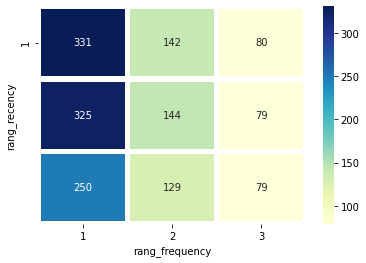

In [218]:
sns.heatmap(viz, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=4.15, annot_kws={"size": 10},yticklabels=4);

> **Комментарий** - В ячейках у нас медианное значение выручки в сегменте (aggfunc=np.median).applymap(int). Чем темнее цвет - тем лучше

11.6 Посчитаем кол-во покупателей в каждой категории

In [222]:
rfm_score_quantity = rfm['rfm_score'].value_counts().sort_values(ascending=False).reset_index()

In [223]:
rfm_score_quantity

,index,rfm_score
0,133,17206
1,233,13259
2,333,13176
3,132,9951
4,232,7095
5,332,7082
6,131,5552
7,331,4368
8,231,4059
9,121,1724


> **Комментарий** - В зависимости от задач, возможно укрупнение сегментов. Видим, что самый "плохой" сегмент 333 на третьем месте по кол-ву покупателей - в этом случае имеет смысл думать над инструментами перевода их в другие сегменты, - например, - рассылки, попробовать различные механики а/б-тесты. Т.е основная задача - передвинуть покупателей на более "хороший" сегмент. С пользователями мы можем по разному работать, начиная от tone of voice и заканчивая общей стратегией коммуникации.

> **Комментарий** - В случае, если планируемая активность предполагает интерес среди многих сегментов и не узко направлена на какой-то сегмент, то имеет смысл объеденить сегменты, с целью снижения нагрузки на отдел маркетинга. Может возникнуть путаница при отправке сообщений и вряд ли мессадж будет концептуально отличаться.

11.7 Создадим таблицу объединения сегментов

| Группа | Кол-во клиентов | Описание                             |Название                   |
| :---   |    :----:       |          ---:                        |---:                       |
|111     | 197             |недавно, часто, чек высокий           |vip                        | 
|        |                 |                                      |                           |
|112     | 48              |недавно, часто, чек средний           |лояльные, постоянные       | 
|121     | 1724            |недавно, 2-4 покупки, чек высокий     |лояльные, постоянные       | 
|122     | 1554            |недавно, 2-4 покупки, чек средний     |лояльные, постоянные       | 
|        |                 |                                      |                           |
|311     | 79              |давно, часто, чек высокий             |vip, потерялись            | 
|        |                 |                                      |                           |
|211     | 117             |нерегулярно, часто, чек высокий       |потенциальные              | 
|212     | 25              |нерегулярно, часто, чек средний       |потенциальные              | 
|221     | 1246            |нерегулярно, 2-4 покупки, чек высокий |потенциальные              | 
|222     | 1306            |нерегулярно, 2-4 покупки, чек средний |потенциальные              | 
|231     | 4059            |нерегулярно, редко, чек высокий       |потенциальные              | 
|232     | 7095            |нерегулярно, редко, чек средний       |потенциальные              | 
|        |                 |                                      |                           |
|113     | 19              |недавно, часто, чек низкий            |менее потенциальные        | 
|123     | 1182            |недавно, 2-4 покупки, чек низкий      |менее потенциальные        | 
|131     | 5552            |недавно, редко, чек высокий           |менее потенциальные        | 
|132     | 9951            |недавно, редко, чек средний           |менее потенциальные        | 
|133     | 17206           |недавно, редко, чек низкий            |менее потенциальные        | 
|213     | 17              |нерегулярно, часто, чек низкий        |менее потенциальные        | 
|223     | 830             |нерегулярно, 2-4 покупки, чек низкий  |менее потенциальные        | 
|        |                 |                                      |                           |
|312     | 30              |давно, часто, чек средний             |спящие, потенциальные      | 
|321     | 1160            |давно, 2-4 покупки, чек высокий       |спящие, потенциальные      | 
|322     | 1086            |давно, 2-4 покупки, чек средний       |спящие, потенциальные      | 
|331     | 4368            |давно, редко, чек высокий             |спящие, потенциальные      | 
|332     | 7082            |давно, редко, чек средний             |спящие, потенциальные      |
|        |                 |                                      |                           |
|233     | 13259           |нерегулярно, редко, чек низкий        |спящие, низкопотенциальные | 
|313     | 14              |давно, часто, чек низкий              |спящие, низкопотенциальные | 
|323     | 976             |давно, 2-4 покупки, чек низкий        |спящие, низкопотенциальные | 
|333     | 13176           |давно, редко, чек низкий              |спящие, низкопотенциальные |

In [224]:
rfm.dtypes

customer_id        object
recency             int64
frequency           int64
monetary          float64
rang_recency        int64
rang_frequency      int64
rang_monetary       int64
rfm_score          object
dtype: object

In [225]:
rfm['rfm_score'] = rfm['rfm_score'].astype(int)


11.8 Присвоим каждому покупателю статус на основе п. 11.7

In [226]:
def description(x):
    if x == 111:
        return 'vip'
    elif x == 112 or x == 121 or x == 122:
        return 'лояльные, постоянные' 
    elif x == 311:
        return 'vip, потерялись' 
    elif x == 211 or x == 212 or x == 221 or x == 222 or x == 231 or x == 232:
        return 'потенциальные' 
    elif x == 113 or x == 123 or x == 131 or x == 132 or x == 133 or x == 213 or x == 223:
        return 'менее потенциальные' 
    elif x == 312 or x == 321 or x == 322 or x == 331 or x == 332:
        return 'спящие, потенциальные'  
    else:
        return 'спящие, низкопотенциальные'  

In [227]:
rfm['description'] = rfm['rfm_score'].apply(lambda x: description(x))

11.8 Финальная таблица для дальнейшей работы - коммуникация, анализ поведения, стратегия

In [228]:
rfm

,customer_id,recency,frequency,monetary,rang_recency,rang_frequency,rang_monetary,rfm_score,description
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,3,2,132,менее потенциальные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,3,3,133,менее потенциальные
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,3,3,333,"спящие, низкопотенциальные"
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,3,3,333,"спящие, низкопотенциальные"
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,3,1,231,потенциальные
...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,3,2,1,321,"спящие, потенциальные"
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,3,3,233,"спящие, низкопотенциальные"
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,3,3,2,332,"спящие, потенциальные"
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,1,3,2,132,менее потенциальные


11.9 Рассчитаем кол-во покупателей в каждом укрупненном сегменте

In [229]:
rfm_status = rfm.copy()

In [230]:
rfm_status = rfm_status.groupby('description') \
                       .agg({'customer_id':'count'}) \
                       .sort_values('customer_id', ascending=False) \
                       .rename(columns={'customer_id': 'quantity'}) \
                       .reset_index()

In [231]:
rfm_status

,description,quantity
0,менее потенциальные,34757
1,"спящие, низкопотенциальные",27425
2,потенциальные,13848
3,"спящие, потенциальные",13726
4,"лояльные, постоянные",3326
5,vip,197
6,"vip, потерялись",79


11.10 Рассчитаем процент каждого сегмента по отношению к общему кол-во покупателей

In [232]:
rfm_status['per_cent_quantity'] = ((rfm_status.quantity / rfm_status.quantity.sum()) * 100).round(2)

In [233]:
rfm_status

,description,quantity,per_cent_quantity
0,менее потенциальные,34757,37.23
1,"спящие, низкопотенциальные",27425,29.38
2,потенциальные,13848,14.83
3,"спящие, потенциальные",13726,14.70
4,"лояльные, постоянные",3326,3.56
5,vip,197,0.21
6,"vip, потерялись",79,0.08


11.11 Рассчитаем выручку по кажому сегменту

In [234]:
rfm_status_revenue = rfm.groupby('description') \
                               .agg({'monetary':'sum'}) \
                               .sort_values('monetary', ascending=False) \
                               .rename(columns={'monetary':'revenue'}) \
                               .round(2) \
                               .reset_index()

In [235]:
rfm_status = rfm_status.merge(rfm_status_revenue, how='left', on='description')

In [236]:
rfm_status['per_cent_revenue'] = ((rfm_status.revenue / rfm_status.revenue.sum()) * 100).round(2)

In [237]:
rfm_status

,description,quantity,per_cent_quantity,revenue,per_cent_revenue
0,менее потенциальные,34757,37.23,4472508.81,33.83
1,"спящие, низкопотенциальные",27425,29.38,1286571.95,9.73
2,потенциальные,13848,14.83,3141616.31,23.76
3,"спящие, потенциальные",13726,14.70,3278118.68,24.79
4,"лояльные, постоянные",3326,3.56,862232.11,6.52
5,vip,197,0.21,122916.27,0.93
6,"vip, потерялись",79,0.08,57533.98,0.44


In [238]:
rfm_status = rfm_status.sort_values('per_cent_revenue', ascending=False)

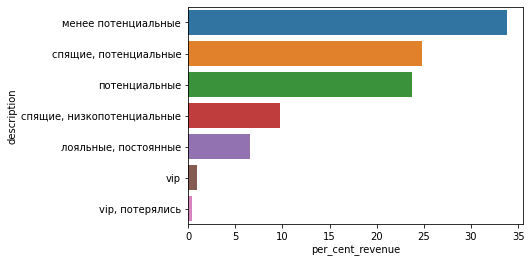

In [239]:
r_plot = sns.barplot(data=rfm_status, y='description', x='per_cent_revenue')


### `12 Результаты анализа и предложения`<a id="step12"></a> 

**12.1 Сколько покупателей сделали только 1 покупку**

Около 92% покупателей (90545 из 99441) совершили покупку только один раз за все время наблюдений (период с 2016-09-15 по 2018-08-29). Период достаточно продолжительный и это говорит о том, что либо покупка единоразовая на много лет вперед, либо через сервис плохо решает "работу" пользователя.


* Минимальное кол-во дней покупок: 1
* Среднее кол-во покупок: 1.2
* Медианное кол-во покупок: 1.0
* Максимальное кол-во покупок: 24

Некоторые пользователи сделали достаточно много покупок - нужно исследовать сегменты пользователей, которые сделали > 1 покупки, выделить источник, понять, на какие "работы" покупатели наняли сервис. 

`Дальнейшие шаги`

Данные говорят о том, что нужно исследовать весь путь пользователя, соотнести каждый этап пути с точками контакта и посмотреть на взаимодействие с ними, - использовать данные систем аналитики, качественные и количественные исследования. Также исходя из работ проверить коммуникацию в точках контакта и инструментах привлечения.


In [240]:
print('Кол-во покупателей сделавших только 1 покупку:', uniq_users_with_1_order.customer_unique_id.count())

Кол-во покупателей сделавших только 1 покупку: 90545


**12.2 Сколько заказов в месяц в среднем не доставляется по разным причинам**

В среднем по причине того, что заказ отменен не доставляется 24%. А по причине отсутствия товара - 29%.

`Дальнейшие шаги`

Исследовать, сколько выручки мы упускаем по каждой из причин. Далее - ответить на вопрос "Почему?", т.е разобраться в причинах таких ситуациий, и выдвинуть гипотезы по их улучшению. Затем, рассчитать рентабельность реализации каждой гипотезы и начать прорабатывать шаги к проверке каждой гипотезы. Возможно, что причина того, что большинство покупателей делали только 1 покупку кроется до этапа подтверждения, - где и происходит отмена.



In [241]:
avg_orders

,order_status,avg
0,canceled,23.047619
1,unavailable,29.000000


**12.3 В какой день недели каждый товар чаще всего покупается**

Выделил не только максимальный день, так как разница между днями может не быть существенной, но и следующий день за ним. 

`Дальнейшие шаги`

Выявить, есть ли периодичность покупок +/- пара дней, неделя. Возможно, запустив ретаргетинг на пользователей которые уже покупали в этот период, можно будет увеличить повторные продажи и совершить upsell на сопутствующие товары.

In [242]:
day_sales

,product_id,day_sales,seller_id,rang
0,99a4788cb24856965c36a24e339b6058,Monday,111,1
1,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,107,1
2,422879e10f46682990de24d770e7f83d,Thursday,104,1
3,422879e10f46682990de24d770e7f83d,Monday,102,2
4,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,102,2
...,...,...,...,...
57700,64976272fa76578e7bb56f6d6d942ef6,Wednesday,1,2
57701,64a15444d55d43542a7b8be3ccd08928,Monday,1,1
57702,64a23a999b90cc6722df6d12c2ee5bf9,Saturday,1,1
57703,64a420f0bb1580b084eab33a8c47fc65,Tuesday,1,1


**12.4 Среднее кол-во покупок по каждому пользователю, в разрезе год/месяц**

Вижу, что кол-во покупок не практически не изменяется месяц к месяцу, год к году. 

`Дальнейшие шаги`

Присвоить каждому пользователю категорию из RFM-анализа, посмотреть на кол-во по сегментам. Посмотреть первый и последующие источники визитов пользователя (какой канал яв-ся путем к покупке) - так выбрав пользователей с самым хорошим с редним числом покупок можем увидеть лучшие практики

In [243]:
tab_avg_sales

,customer_unique_id,year_sales,month_sales,avg_sales_per_week
95291,ffffd2657e2aad2907e67c3e9daecbeb,2017,May,4.4
32136,ffff5962728ec6157033ef9805bacc48,2018,May,4.4
32137,ffff371b4d645b6ecea244b27531430a,2017,February,4.0
32138,fffea47cd6d3cc0a88bd621562a9d061,2018,January,4.4
32139,fffcf5a5ff07b0908bd4e2dbc735a684,2017,July,4.4
...,...,...,...,...
63729,0004aac84e0df4da2b147fca70cf8255,2017,November,4.3
63730,0000f6ccb0745a6a4b88665a16c9f078,2017,November,4.3
63731,0000f46a3911fa3c0805444483337064,2017,April,4.3
79609,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,May,4.4


**12.5 Когортный анализ пользователей**

Результаты довольно интересные. В период с апреля по октябрь первый месяц когорты показывают самое лучшее удержание. А когорта от марта 2017 года показывает постоянный уровень удержания на периоде 4 месяца. Причем, тренд роста кол-ва покупателей в когорте 0 месяца растет, и при этом показатели удержания сохраняются. Похоже магазин предпринял некоторые меры для улучшения ситуации, поэтому больше покупателей вернулись сюда снова. Также стоит разобраться в месяцах, где когорты показывали нулевой уровень удержания

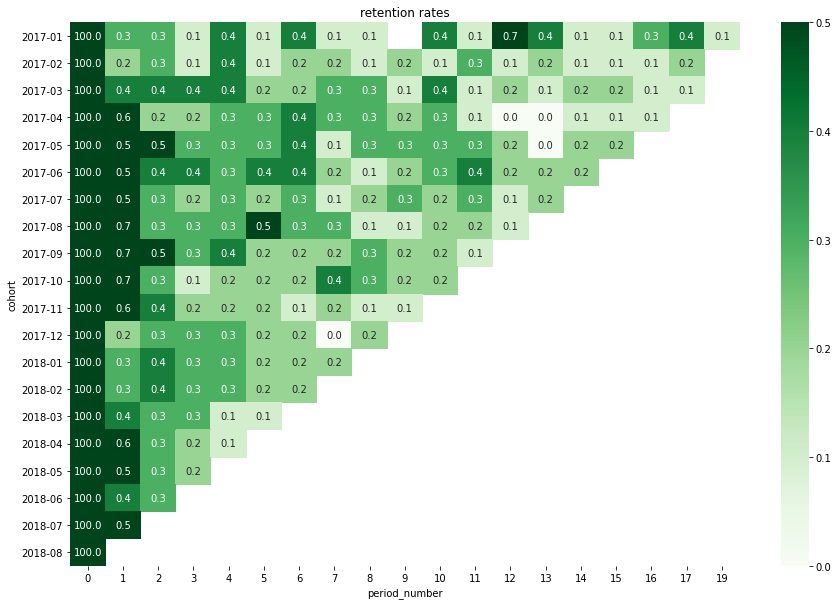

In [244]:
plt.figure(figsize=(15, 10))
plt.title('retention rates')
sns.heatmap(data=retention,annot = True,fmt = '',vmin = 0.0,vmax = 0.5,cmap="Greens")
plt.show()

**12.6 RFM-анализ**

Основной мотив исследования - зная сезонность и группы реализовать более точечную коммуникацию для каждого сегмента с целью повышения выручки.

`Выбор метрик для анализа`

Самое сложное - определить границы сегментов, для этого были рассчитаны средние, медианы и перцентили по каждому параметру. Основным показателем выбрал перцентили, используя их позволяют нарезал слоями массив данных, ранжировал по кол-ву, выручке, частоте (см. п.10 Выбор метрик для анализа). Дополнительно в разделении сегментов пробовал приблизится к закону Парето. 

Итог:

| Категория | Давность последней покупки (Recency) | Частота покупок (Frequency) |Сумма покупки (Monetary) |
| :---      |    :----:                            |          ---:               |---:                     |
| 1         | 134 и менее дней назад               |  от 5 и более покупок       | от 179,91 руб. и более  |
| 2         | от 178 до 312 дней назад             |  2-4 покупки                | от 89,76 руб. до 179,90 |
| 3         | от 313 дней назад                    |  1 покупка (очень редко)    | 89.70 и меньше          |

В результате было сформировано 27 сегментов, которые объеденил в 7 групп.

`На чем стоит сфокусироваться`

1. Увеличить кол-во повторных покупок, перевести пользователей, кто сделал одну покупку, в тех, кто сделате 2-4
2. Сфокусирофаться на увеличении среднего чего 
3. Реанимировать vip-пользователей, + условия для них и сарафанное радио
4. Существенное кол-во спящих - реанимировать - основной фокус здесь - спящие, потенциальные, т.к работа над спящими низко потенциальные вероятно всего оттянут на себя много ресурсов, но "профит" будет такой, что вложения будут не рентабельны. 
5. Лояльные, постоянные - здесь направление увеличения среднего чека, но для них не надо делать часто рассылки, чтобы не надоесть. Пиарить заботу о них. 
6. VIP - сделать что-то для них, чтобы был эффект "ВАУ", - с целью рекомендации сервиса.
7. Выделить отдельную ветку исследований спящих сегментов - контексты, барьеры, драйверы, коммуникация.

### [Вернуться в начало](#stepend)</n>